In [1]:
from google.colab import files
uploaded = files.upload()


Saving Flat Price Estimation for UrbanNest Realtors.csv to Flat Price Estimation for UrbanNest Realtors.csv


In [2]:
import pandas as pd

df = pd.read_csv("Flat Price Estimation for UrbanNest Realtors.csv")
df.head()


,area_sqft,bedrooms,distance_to_metro_km,age_of_flat_years,amenities_score,flat_price
0,693.0,4,2.49,17,7.0,2077761.0
1,755.0,3,2.04,11,1.3,2185745.0
2,1646.0,4,1.46,22,1.0,4343281.0
3,1036.0,4,0.10,6,7.7,3037490.0
4,1064.0,2,1.50,24,6.3,3019102.0


✅ Dataset loaded successfully!

📊 Dataset Preview:
   area_sqft  bedrooms  distance_to_metro_km  age_of_flat_years  \
0      693.0         4                  2.49                 17   
1      755.0         3                  2.04                 11   
2     1646.0         4                  1.46                 22   
3     1036.0         4                  0.10                  6   
4     1064.0         2                  1.50                 24   

   amenities_score  flat_price  
0              7.0   2077761.0  
1              1.3   2185745.0  
2              1.0   4343281.0  
3              7.7   3037490.0  
4              6.3   3019102.0  

📋 Data Summary:
         area_sqft     bedrooms  distance_to_metro_km  age_of_flat_years  \
count  1000.000000  1000.000000           1000.000000        1000.000000   
mean    995.077000     2.507000              2.061090          14.665000   
std     287.435193     1.114088              1.994558           8.701407   
min     300.000000     1.00

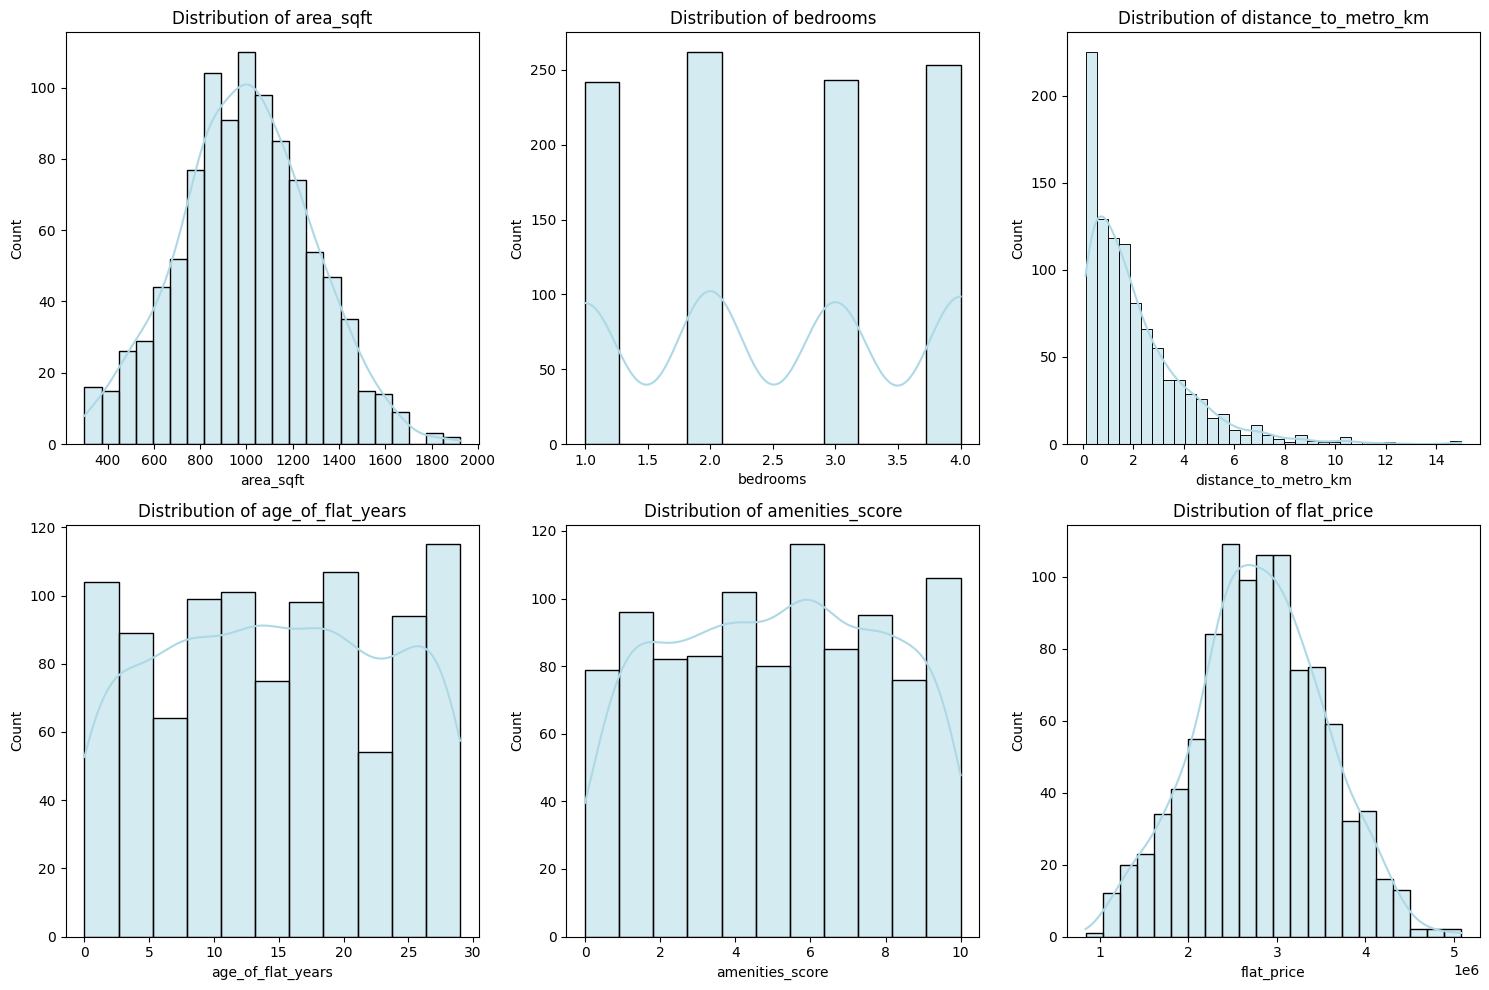

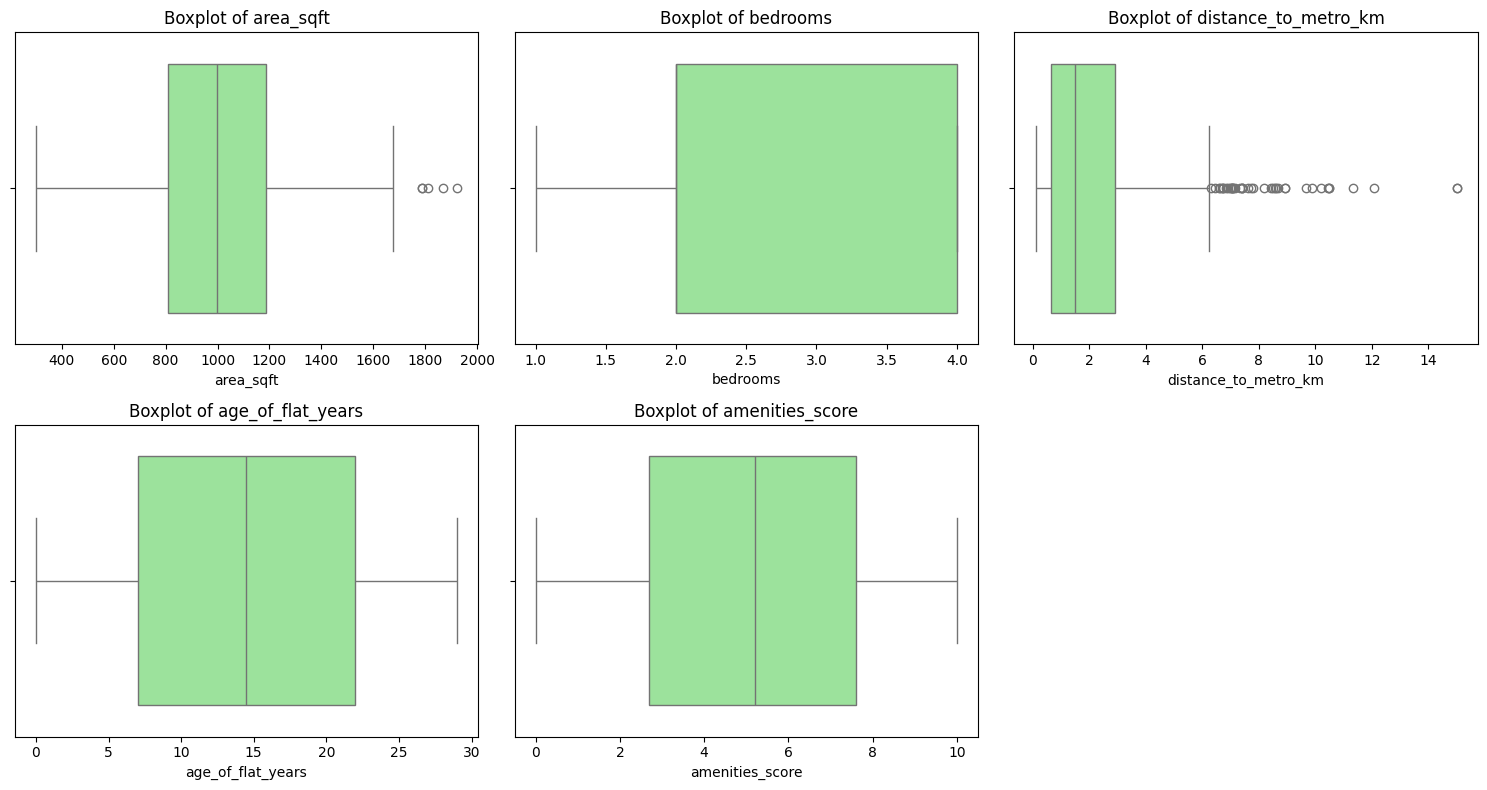

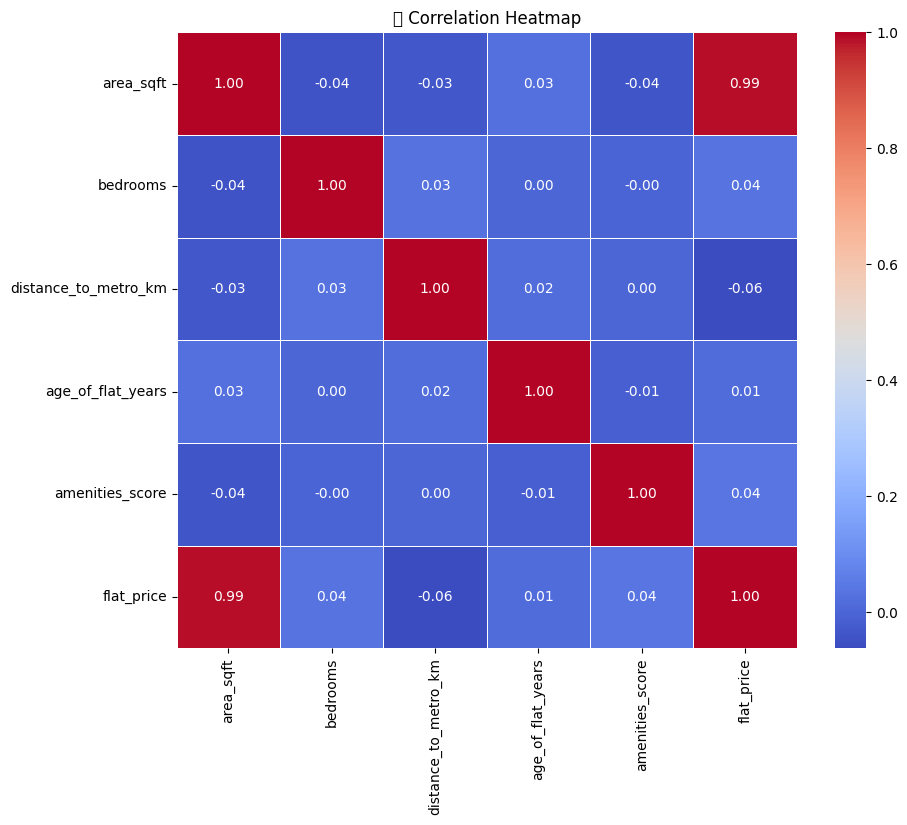


✅ Data split into training and testing sets.
✅ Linear Regression model trained.

📈 Model Performance:
🔹 Mean Squared Error (MSE): 2258216330.87
🔹 R² Score: 1.00


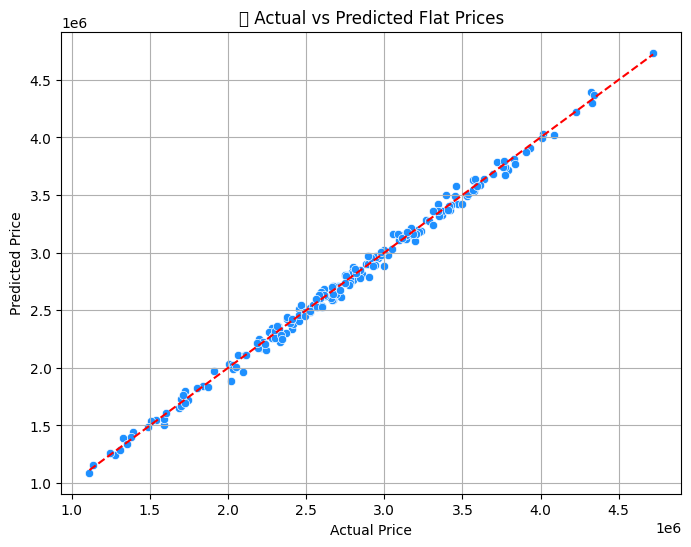

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("Flat Price Estimation for UrbanNest Realtors.csv")
print("✅ Dataset loaded successfully!")

print("\n📊 Dataset Preview:")
print(df.head())

print("\n📋 Data Summary:")
print(df.describe())

print("\n📎 Column Info:")
print(df.info())

features = ['area_sqft', 'bedrooms', 'distance_to_metro_km', 'age_of_flat_years', 'amenities_score', 'flat_price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, col in enumerate(features[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap")
plt.show()

X = df[['area_sqft', 'bedrooms', 'distance_to_metro_km', 'age_of_flat_years', 'amenities_score']]
y = df['flat_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Data split into training and testing sets.")

model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Linear Regression model trained.")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Performance:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('🏠 Actual vs Predicted Flat Prices')
plt.grid(True)
plt.show()
